In [1]:
import pandas as pd
import numpy as np
from numpy import mean
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv("DatacyclesDetails.csv")
cycleDetails = pd.read_json("DataCyclesDetails.json")
data1 = pd.read_csv("DataCyclesAndEpisodeTime.csv")
activities = pd.read_json("activities.json")
steps = pd.read_json("../RQ2/steps.json")
cycles = pd.read_json("DataCyclesAndEpisodeTime.json")

In [4]:
summary = pd.DataFrame(data1.groupby('Work').mean())
summary1 = pd.DataFrame(data1.groupby('Work').sum())
summary2 = pd.DataFrame(data1.groupby('Work').median())
data1["episodes length in minutes"] = data1["episode duration in seconds"].apply(lambda x: x/60 )
cycles["episode duration in minutes"] = cycles["episodeTime"].apply(lambda x: x/60 )

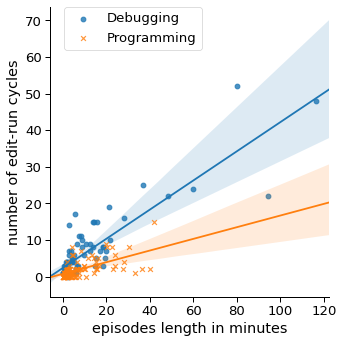

In [6]:
sns.set_context("paper", font_scale=1.5)

l=sns.lmplot(x="episodes length in minutes", y="number of edit-run cycles", hue="Work",markers=["o", "x"],truncate=False, data=data1, legend_out=False)
plt.legend(bbox_to_anchor=(0.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.savefig("episodeTimeVsCycle.pdf")

In [7]:
cycles.groupby("work")["cycles"].describe()

,count,mean,std,min,25%,50%,75%,max
work,,,,,,,,
debugging,89.0,6.528090,8.807396,0.0,1.0,3.0,8.0,52.0
programming,104.0,1.990385,2.517879,0.0,0.0,1.0,2.0,15.0


In [8]:
data1.groupby("Work")["number of edit-run cycles"].describe()

,count,mean,std,min,25%,50%,75%,max
Work,,,,,,,,
Debugging,89.0,6.528090,8.807396,0.0,1.0,3.0,8.0,52.0
Programming,104.0,1.990385,2.517879,0.0,0.0,1.0,2.0,15.0


In [9]:
# this is correlation for the number of cycles and progamming time
programming = data1.loc[(data1.Work == "Programming")]
rProgramming = programming["episode duration in minutes"].corr(programming["number of edit-run cycles"])
rProgramming

0.5905163186363547

In [10]:
# this is correlation for the number of cycles and progamming time
debugging = data1.loc[(data1.Work == "Debugging")]
rDebugging = debugging["episode duration in minutes"].corr(debugging["number of edit-run cycles"])
rDebugging

0.8753144629830129

In [11]:
debugging = data.loc[(data.work == "Debugging")]
programming = data.loc[(data.work == "Programming")]



In [12]:
data.describe()

,activities,cycleTime,edit,test,resrouces,interactingIDE,other
count,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000
mean,4.163706,114.269036,2.571066,1.050761,0.126904,0.282995,0.131980
std,5.081281,180.692698,4.110454,0.289524,0.567334,0.926726,0.547924
min,2.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,24.750000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,2.000000,55.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,4.000000,130.000000,2.250000,1.000000,0.000000,0.000000,0.000000
max,64.000000,1903.000000,61.000000,5.000000,9.000000,15.000000,8.000000


In [13]:

with open('mytable.tex', 'w') as tf:
     tf.write(programming.describe().to_latex())

<AxesSubplot:>

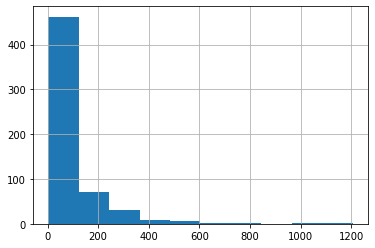

In [14]:
debugging.cycleTime.hist()

<AxesSubplot:>

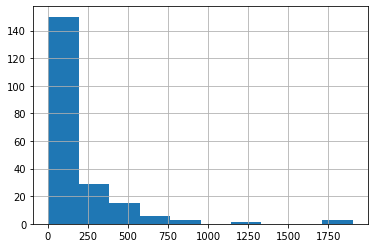

In [15]:
programming.cycleTime.hist()

<AxesSubplot:xlabel='cycleTime', ylabel='Density'>

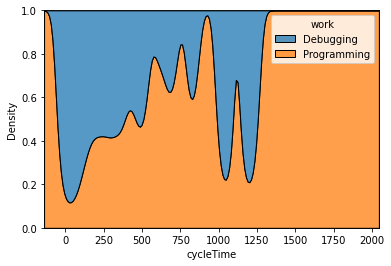

In [16]:
 sns.kdeplot(data=data, x="cycleTime", hue="work", multiple="fill")



<AxesSubplot:xlabel='work', ylabel='activities'>

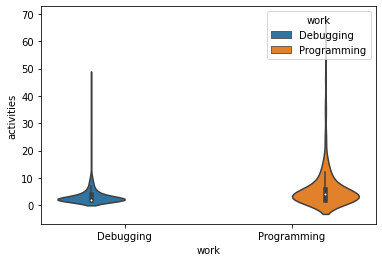

In [17]:
sns.violinplot(data=data, x="work", y="activities", hue="work", multiple="stack")


In [18]:
# sns.histplot(programming.cycleTime)


In [7]:
data["cycleTimeInMinutes"] = data.cycleTime.apply(lambda x: x/60 );
cycleDetails["cycleTimeInMinutes"] = cycleDetails.cycleTime.apply(lambda x: x/60 );

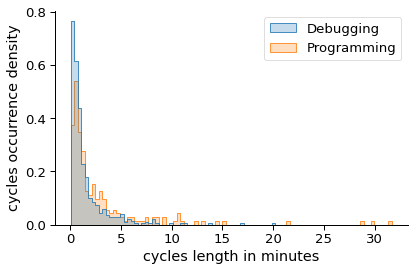

In [8]:
sns.set_context("paper", font_scale=1.5)

f, ax = plt.subplots()

sns.histplot(cycleDetails, x="cycleTimeInMinutes", hue="work", element="step" ,stat="density",  ax=ax,legend=True, common_norm=False)
ax.get_legend().set_title(None)


sns.despine(top = True, right = True)

ax.set_xlabel("cycles length in minutes")
ax.set_ylabel("cycles occurrence density")
plt.tight_layout()
plt.savefig("cyclesTimevsCycleDensity.pdf")

In [41]:
cycleDetails.groupby("work")["cycleTimeInMinutes"].describe()

,count,mean,std,min,25%,50%,75%,max
work,,,,,,,,
Debugging,581.0,1.456684,2.011090,0.050000,0.366667,0.766667,1.616667,19.966667
Programming,207.0,2.942915,4.579093,0.083333,0.616667,1.283333,3.216667,31.716667


In [42]:
data.groupby("work")["cycleTimeInMinutes"].describe()

,count,mean,std,min,25%,50%,75%,max
work,,,,,,,,
Debugging,581.0,1.483649,2.024915,0.050000,0.366667,0.783333,1.683333,20.100000
Programming,207.0,3.085668,4.604638,0.083333,0.633333,1.400000,3.441667,31.716667


<AxesSubplot:xlabel='cycleTime', ylabel='Density'>

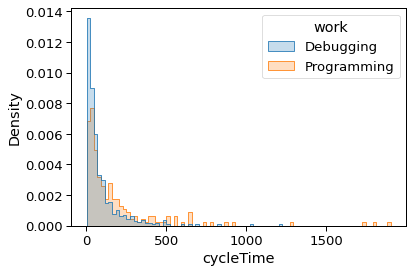

In [43]:
sns.histplot(data, x="cycleTime", hue="work", element="step",stat="density", common_norm=False)


31.716666666666665

In [44]:
activities["activity time (log)"] = np.log(activities['time']);

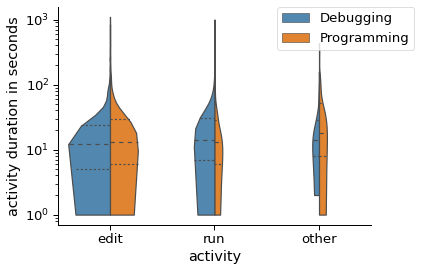

In [45]:
f, ax = plt.subplots()
ax.set(yscale="log")
g=sns.violinplot(x="activity", y="time", hue="work", data=activities,  split=True,
                    scale="count", inner="quartile",scale_hue=False,cut=0, ax=ax, palette={"Programming": "#FF8213", "Debugging": "#428BBF"})
ax.set_ylabel("activity duration in seconds")
sns.despine(top = True, right = True)
ax.legend(bbox_to_anchor=(.7, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
# plt.savefig("activityvsDurationpdf.pdf")

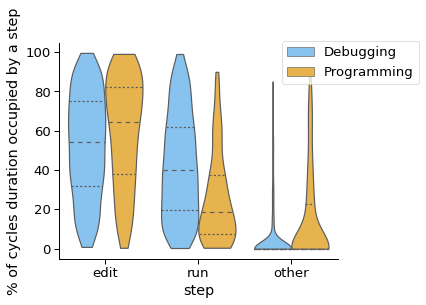

In [46]:

f, ax = plt.subplots()
sns.violinplot(x="step", y="percentage", hue="work", data=steps,  split=False, scale="width", inner="quartile", ax=ax, palette={"Programming": "#FFBB35", "Debugging": "#77C5FF"}, cut=0)
ax.set_ylabel("% of cycles duration occupied by a step")
sns.despine(top = True, right = True)
ax.legend(bbox_to_anchor=(.8, 1.01), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.savefig("stepsOccupancy.pdf")


<AxesSubplot:xlabel='step', ylabel='percentage'>

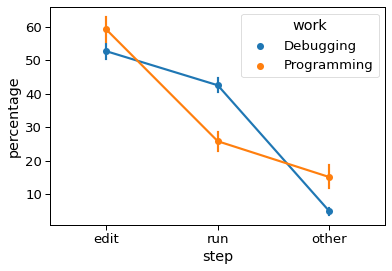

In [47]:
sns.pointplot(x="step", y="percentage", hue="work", data=steps, estimator=mean)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [48]:
activities.describe()

,time,activity time (log)
count,3281.000000,3281.000000
mean,27.444072,2.600294
std,52.681596,1.149645
min,1.000000,0.000000
25%,6.000000,1.791759
50%,13.000000,2.564949
75%,28.000000,3.332205
max,1101.000000,7.003974


In [49]:
cycleDetails.groupby("work").cycleTime.describe()

,count,mean,std,min,25%,50%,75%,max
work,,,,,,,,
Debugging,581.0,87.401033,120.665393,3.0,22.0,46.0,97.0,1198.0
Programming,207.0,176.574879,274.745589,5.0,37.0,77.0,193.0,1903.0


In [50]:
data.groupby("work").cycleTime.describe()

,count,mean,std,min,25%,50%,75%,max
work,,,,,,,,
Debugging,581.0,89.018933,121.494904,3.0,22.0,47.0,101.0,1206.0
Programming,207.0,185.140097,276.278308,5.0,38.0,84.0,206.5,1903.0


In [51]:
data.where(data["cycleTime"] > 300).groupby("work").count()

,activities,cycleTime,edit,test,resrouces,interactingIDE,other,cycleTimeInMinutes
work,,,,,,,,
Debugging,30,30,30,30,30,30,30,30
Programming,34,34,34,34,34,34,34,34


In [52]:
# % of other work in programming and debugging 

Debugging,Programming = data.groupby("work").activities.count()
otherDebugging, otherProgramming = data[(data["resrouces"] == 0) & (data["interactingIDE"] == 0) & (data["other"] == 0) ].groupby("work").activities.count()
data[(data["resrouces"] == 0) & (data["interactingIDE"] == 0) & (data["other"] == 0) ].groupby("work").describe()
debuggingOtherPres = otherDebugging / Debugging *100
programmingOtherPres = otherProgramming / Programming *100

In [53]:
programmingOtherPres

57.00483091787439